### Area Plots, Histograms, and Bar Charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.style.use('ggplot') # for ggplot like style

In [3]:
print('Matplotlib version : ', mpl.__version__)

Matplotlib version :  3.7.3


In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [5]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [7]:
df.shape

(195, 39)

In [8]:
# set index 'Country' column

df.set_index('Country', inplace=True)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [13]:
# finally, let's create a list of years from 1980 - 2013
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#### Area plot

In [40]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df.head(5)
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


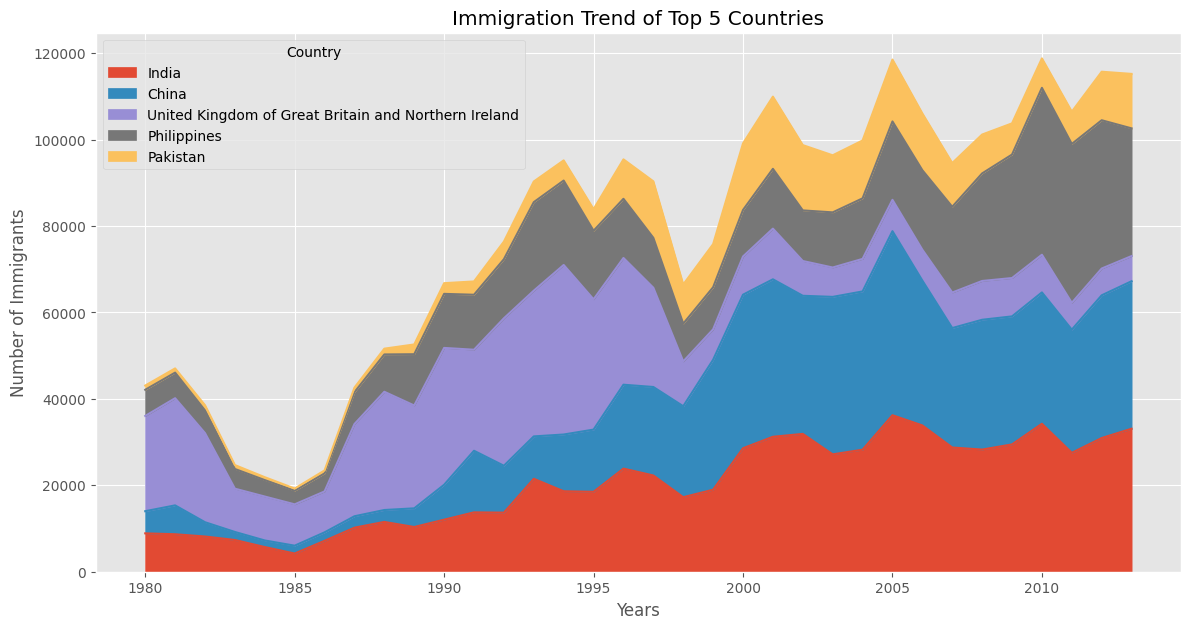

In [41]:
# 1. top5 countries area plot

df_top5.plot(kind='area', figsize=(14,7))
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

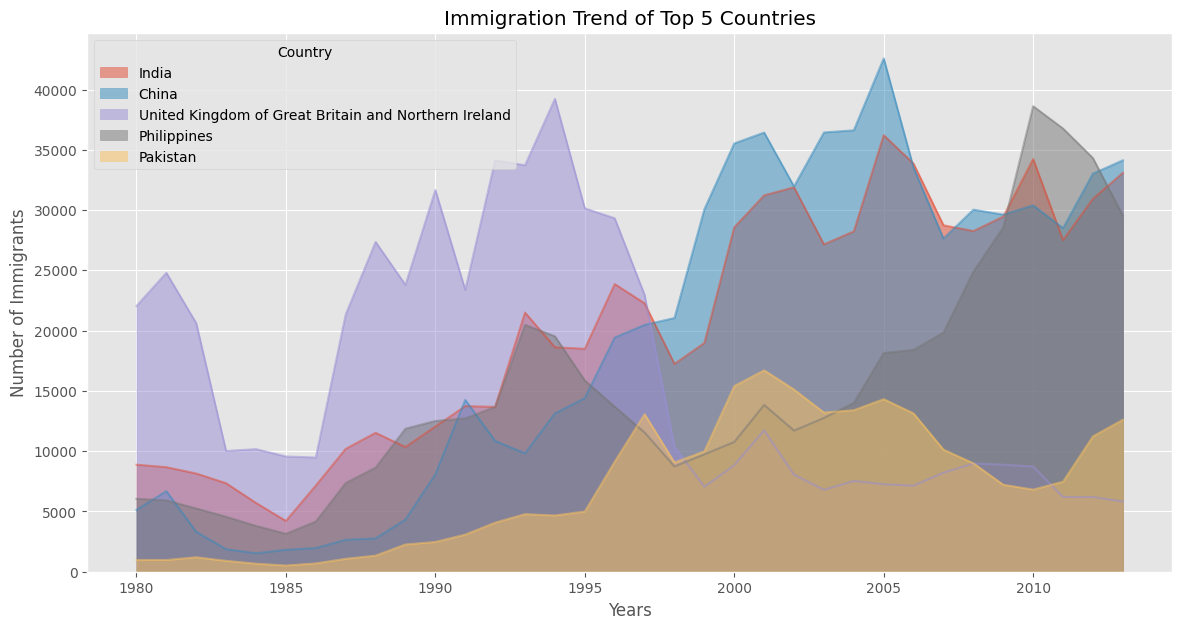

In [42]:
# 2 plot

df_top5.plot(kind='area', figsize=(14,7), stacked=False)
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

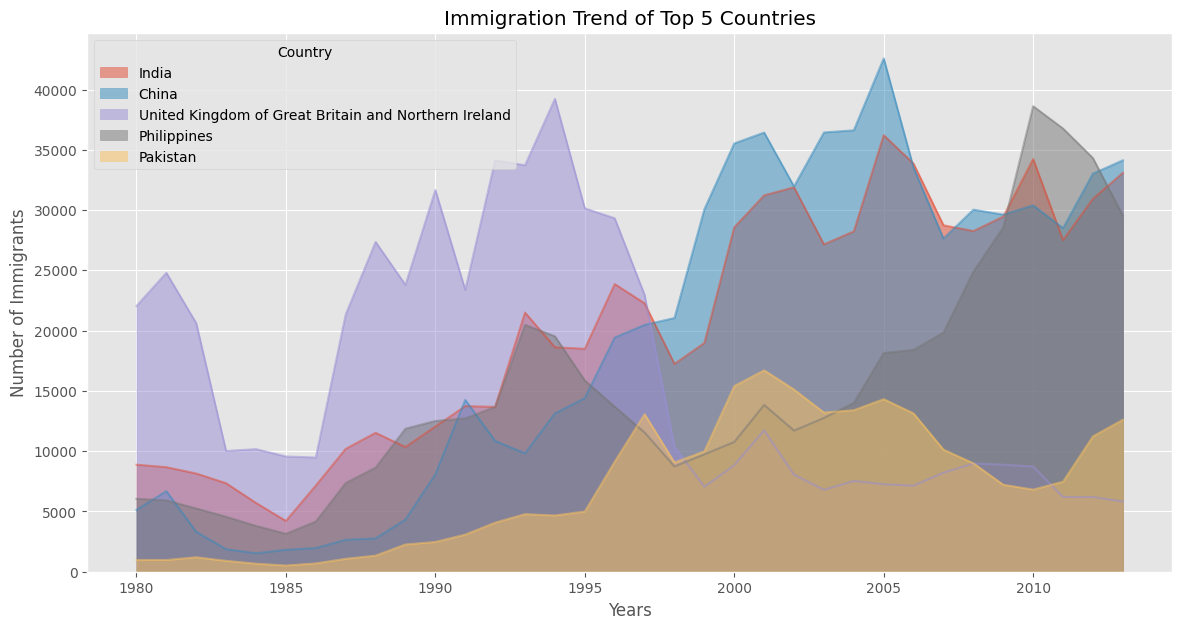

In [43]:
# 3

df_top5.plot(kind='area', figsize=(14,7), stacked=False, alpha=0.5)
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

Text(0, 0.5, 'Number of Immigrants')

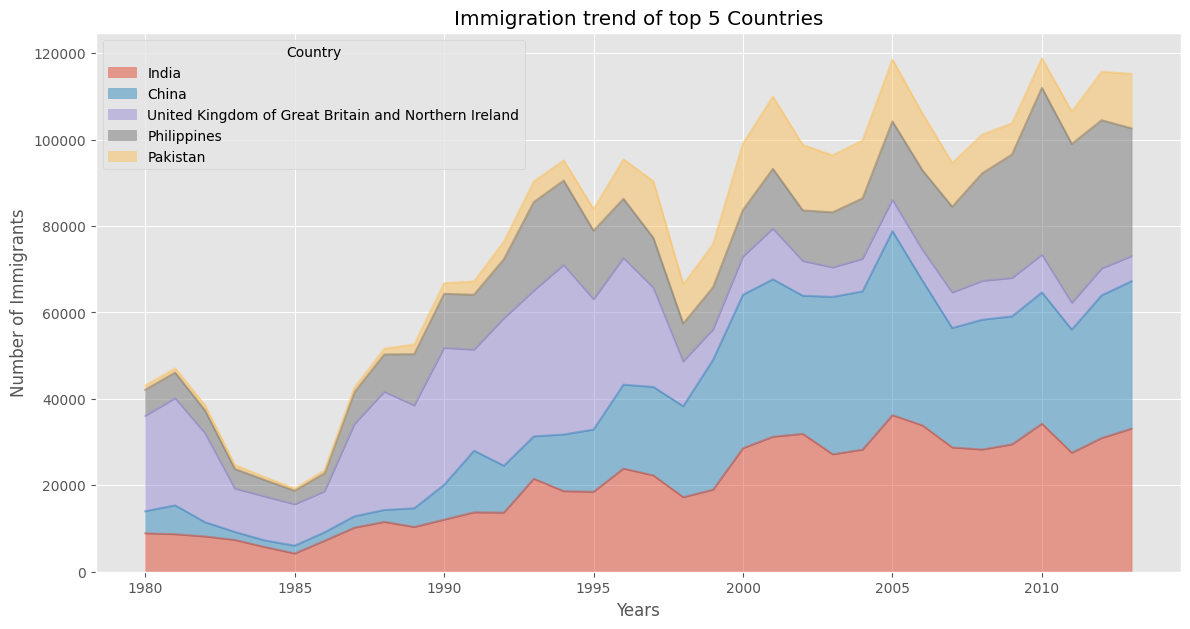

In [44]:
# Same plot using Artis layer of matplotlib

ax = df_top5.plot(kind='area', alpha=0.5, figsize=(14,7))
ax.set_title('Immigration trend of top 5 Countries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

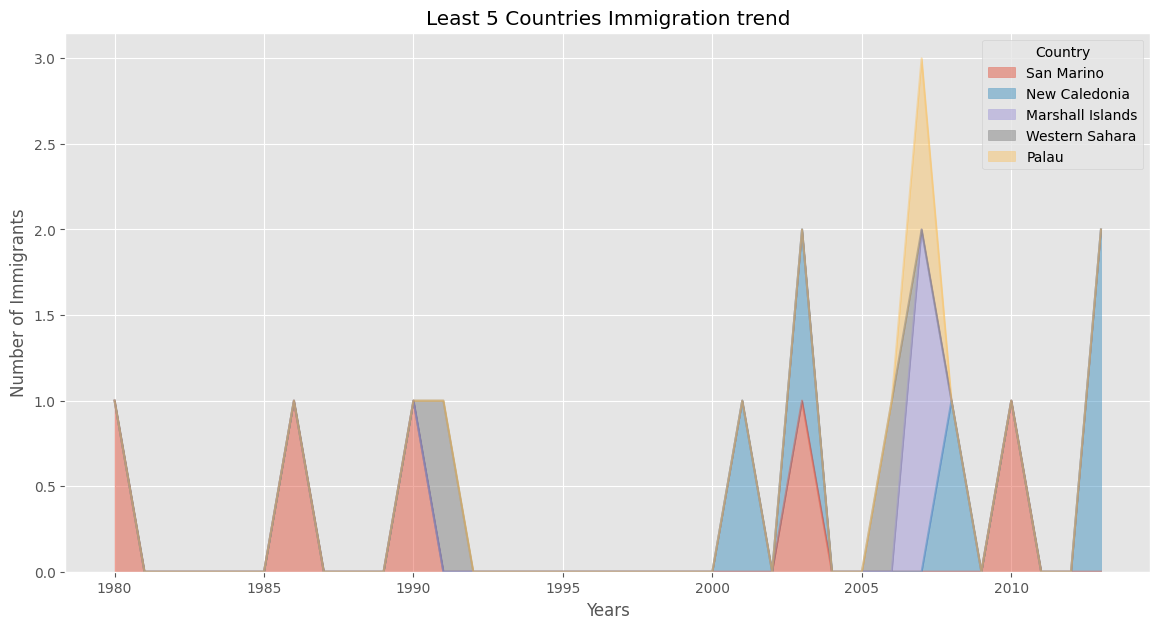

In [53]:
# Use the scripting layer to create a stacked area plot of the 
# 5 countries that contributed the least to immigration to Canada 
# from 1980 to 2013. Use a transparency value of 0.45.

df_least5 = df.tail(5)
df_least5 = df_least5[years].transpose()

df_least5.plot(kind='area', alpha=0.45, figsize=(14,7))
plt.title('Least 5 Countries Immigration trend')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

Text(0, 0.5, 'Number of Immigrants')

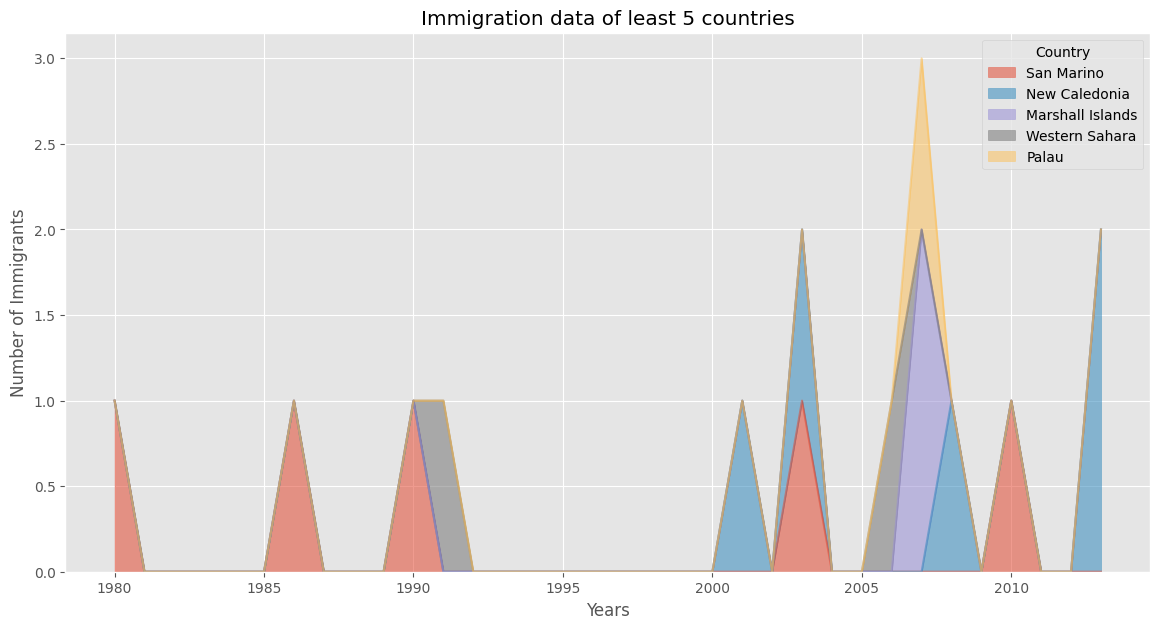

In [55]:
# Use the artist layer to create an unstacked area plot of the 5 countries
# that contributed the least to immigration to Canada from 1980 to 2013.
# Use a transparency value of 0.55.

df_least5 = df.tail(5)
df_least5 = df_least5[years].transpose()

ax = df_least5.plot(kind='area', alpha=0.55, figsize=(14,7))
ax.set_title('Immigration data of least 5 countries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')


### Histograms

In [56]:
# What is the frequency distribution of the number (population)
# of new immigrants from the various countries to Canada in 2013?

In [57]:
df['2013']

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
                                                        ...  
San Marino                                                  0
New Caledonia                                               2
Marshall Islands                                            0
Western Sahara                                              0
Palau                                                       0
Name: 2013, Length: 195, dtype: int64

In [59]:
# np.histogram returns 2 values
# By default, the histrogram method breaks up the dataset into 10 bins.
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


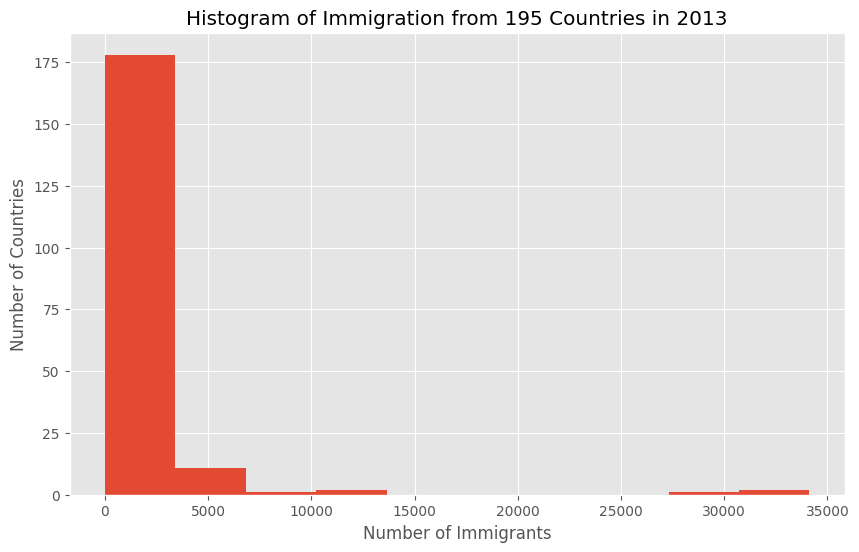

In [64]:
# We can easily graph this distribution by passing kind=hist to plot()

df['2013'].plot(kind='hist', figsize=(10,6))
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.show()

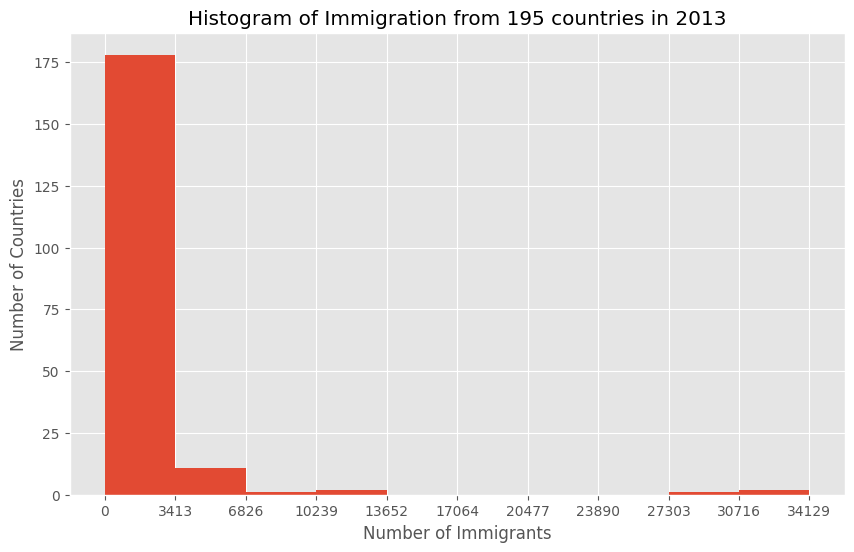

In [65]:
# In the above plot, the x-axis represents the population range of immigrants
# in intervals of 3412.9. The y-axis represents the number of countries
# that contributed to the aforementioned population.

# bin_edges is a list of bin intervals
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(10,6), xticks = bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

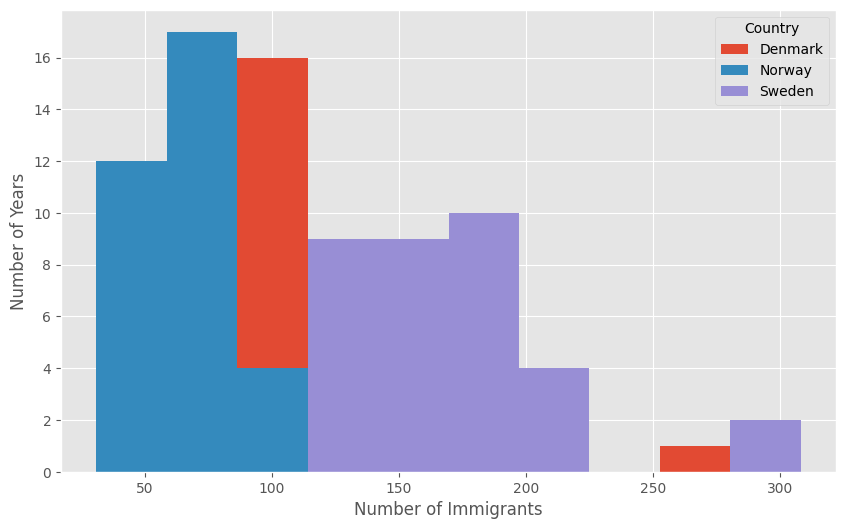

In [82]:
# What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013

df_DNS = df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_DNS = df_DNS.transpose()

df_DNS.plot(kind='hist', figsize=(10,6))
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.show()

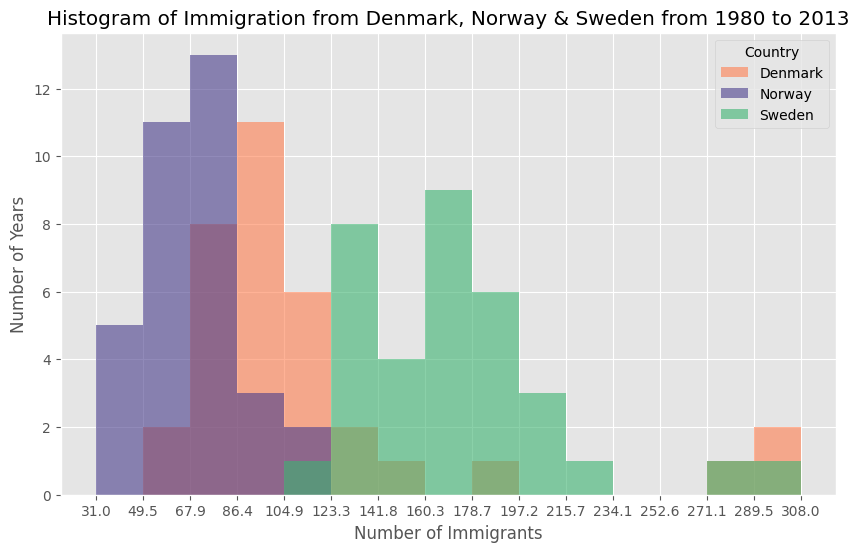

In [86]:
# increase the bin size to 15 by passing in bins parameter;
# set transparency to 60% by passing in alpha parameter;
# label the x-axis by passing in x-label parameter;
# change the colors of the plots by passing in color parameter.

count, bin_edges = np.histogram(df_DNS, 15)

df_DNS.plot(kind='hist', figsize=(10,6),
            alpha=0.6, 
            bins=15,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.title('Histogram of Immigration from Denmark, Norway & Sweden from 1980 to 2013')
plt.show()

In [93]:
# For a full listing of colors available in Matplotlib
import matplotlib

count = 0
for name, hex in matplotlib.colors.cnames.items():
    count += 1
    print(count, name,'--', hex)

1 aliceblue -- #F0F8FF
2 antiquewhite -- #FAEBD7
3 aqua -- #00FFFF
4 aquamarine -- #7FFFD4
5 azure -- #F0FFFF
6 beige -- #F5F5DC
7 bisque -- #FFE4C4
8 black -- #000000
9 blanchedalmond -- #FFEBCD
10 blue -- #0000FF
11 blueviolet -- #8A2BE2
12 brown -- #A52A2A
13 burlywood -- #DEB887
14 cadetblue -- #5F9EA0
15 chartreuse -- #7FFF00
16 chocolate -- #D2691E
17 coral -- #FF7F50
18 cornflowerblue -- #6495ED
19 cornsilk -- #FFF8DC
20 crimson -- #DC143C
21 cyan -- #00FFFF
22 darkblue -- #00008B
23 darkcyan -- #008B8B
24 darkgoldenrod -- #B8860B
25 darkgray -- #A9A9A9
26 darkgreen -- #006400
27 darkgrey -- #A9A9A9
28 darkkhaki -- #BDB76B
29 darkmagenta -- #8B008B
30 darkolivegreen -- #556B2F
31 darkorange -- #FF8C00
32 darkorchid -- #9932CC
33 darkred -- #8B0000
34 darksalmon -- #E9967A
35 darkseagreen -- #8FBC8F
36 darkslateblue -- #483D8B
37 darkslategray -- #2F4F4F
38 darkslategrey -- #2F4F4F
39 darkturquoise -- #00CED1
40 darkviolet -- #9400D3
41 deeppink -- #FF1493
42 deepskyblue -- #00BF

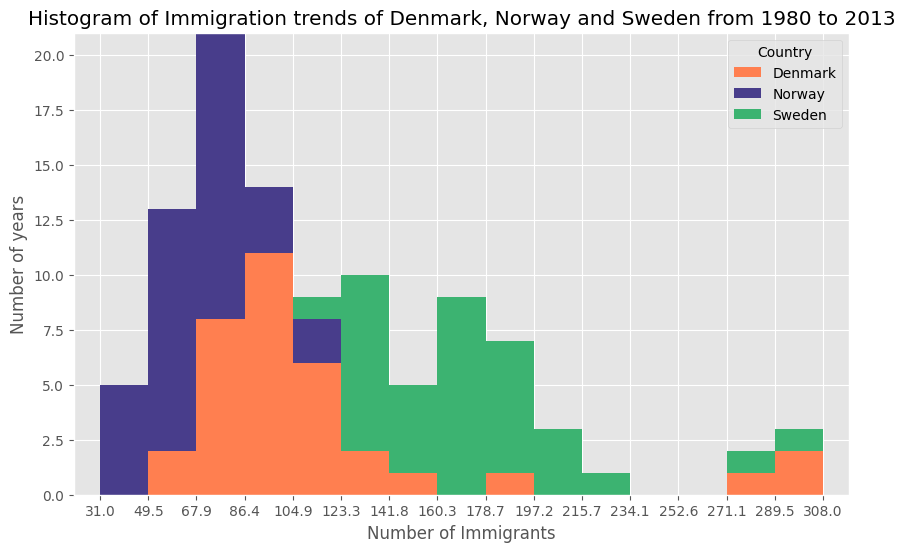

In [97]:
# If we do not want the plots to overlap each other,
# we can stack them using the stacked parameter.
# Let's also adjust the min and max x-axis labels
# to remove the extra gap on the edges of the plot.
# We can pass a tuple (min,max) using the xlim paramate


count, bin_edges = np.histogram(df_DNS, 15)
xmin = bin_edges[0] - 10  #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

df_DNS.plot(kind='hist', figsize=(10,6), bins=15,
           xticks=bin_edges,
           color=['coral', 'darkslateblue', 'mediumseagreen'],
           stacked = True,
           xlim = (xmin, xmax))

plt.title('Histogram of Immigration trends of Denmark, Norway and Sweden from 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of years')
plt.show()

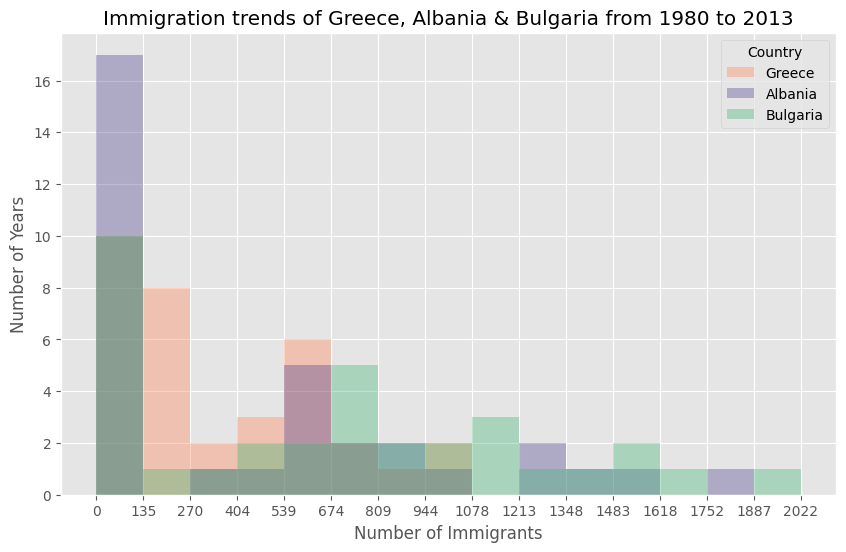

In [102]:
# Use the scripting layer to display the immigration distribution
# for Greece, Albania, and Bulgaria for years 1980 - 2013
# Use an overlapping plot with 15 bins and a transparency value of 0.35.

df_GAB = df.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_GAB = df_GAB.transpose()

count, bin_edges = np.histogram(df_GAB, 15)
df_GAB.plot(kind='hist', figsize=(10,6),
           bins=15,
           xticks=bin_edges,
           color=['coral', 'darkslateblue', 'mediumseagreen'],
           alpha = 0.35)

plt.title('Immigration trends of Greece, Albania & Bulgaria from 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.show()

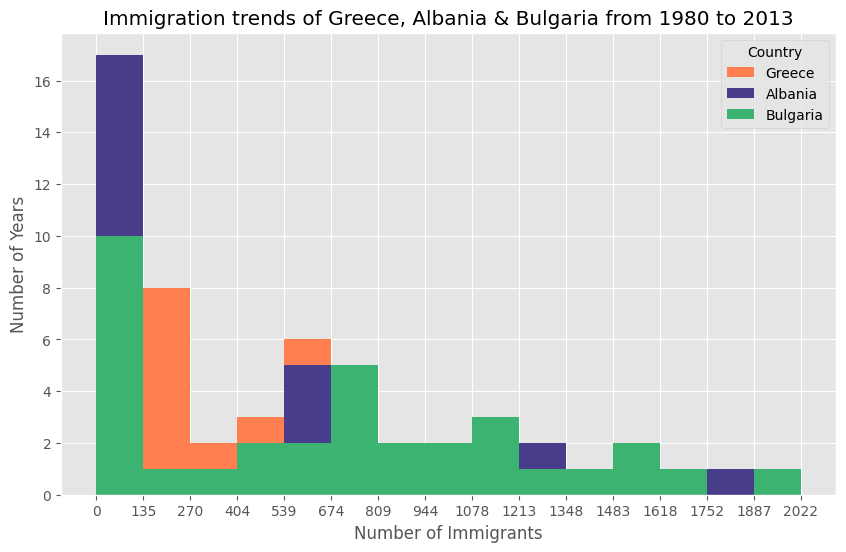

In [104]:
# 2

df_GAB = df.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_GAB = df_GAB.transpose()

count, bin_edges = np.histogram(df_GAB, 15)
df_GAB.plot(kind='hist', figsize=(10,6),
           bins=15,
           xticks=bin_edges,
           color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Immigration trends of Greece, Albania & Bulgaria from 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.show()

### Bar Charts (Dataframe)

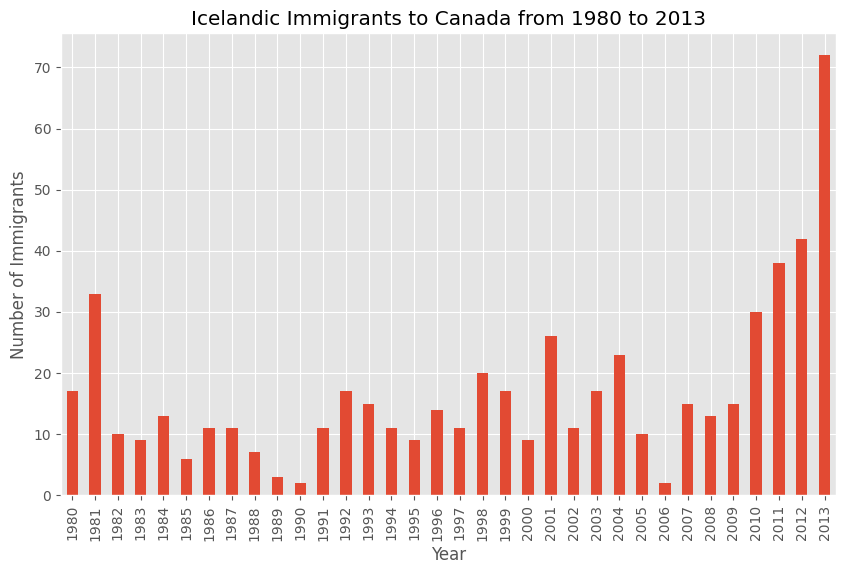

In [113]:
# Let's compare the number of Icelandic immigrants
# (country = 'Iceland') to Canada from year 1980 to 2013.

df_iceland = df.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.show()

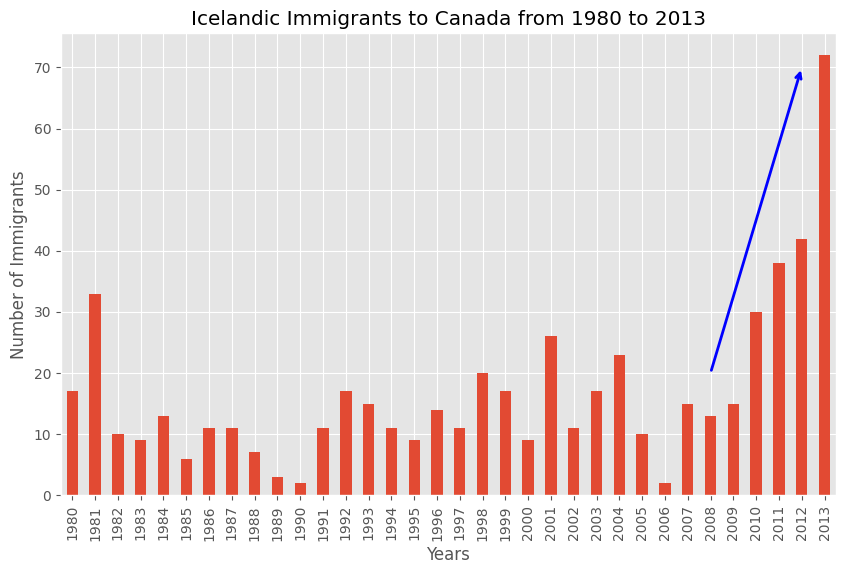

In [120]:
# add annotate arrow

df_iceland = df.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(10,6))
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')


# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

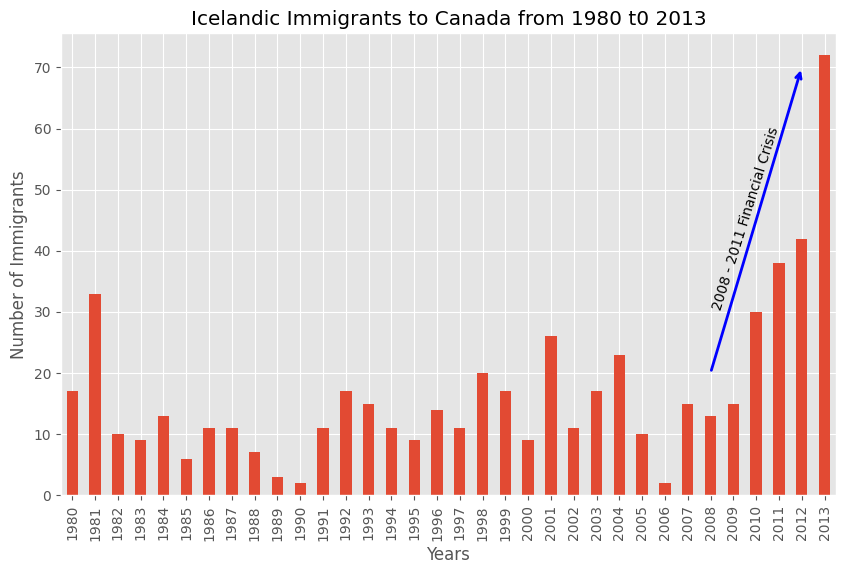

In [122]:
df_iceland.plot(kind='bar', figsize=(10,6))

plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 t0 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left')  # want the text to be horizontally 'left' algned.
             

plt.show()


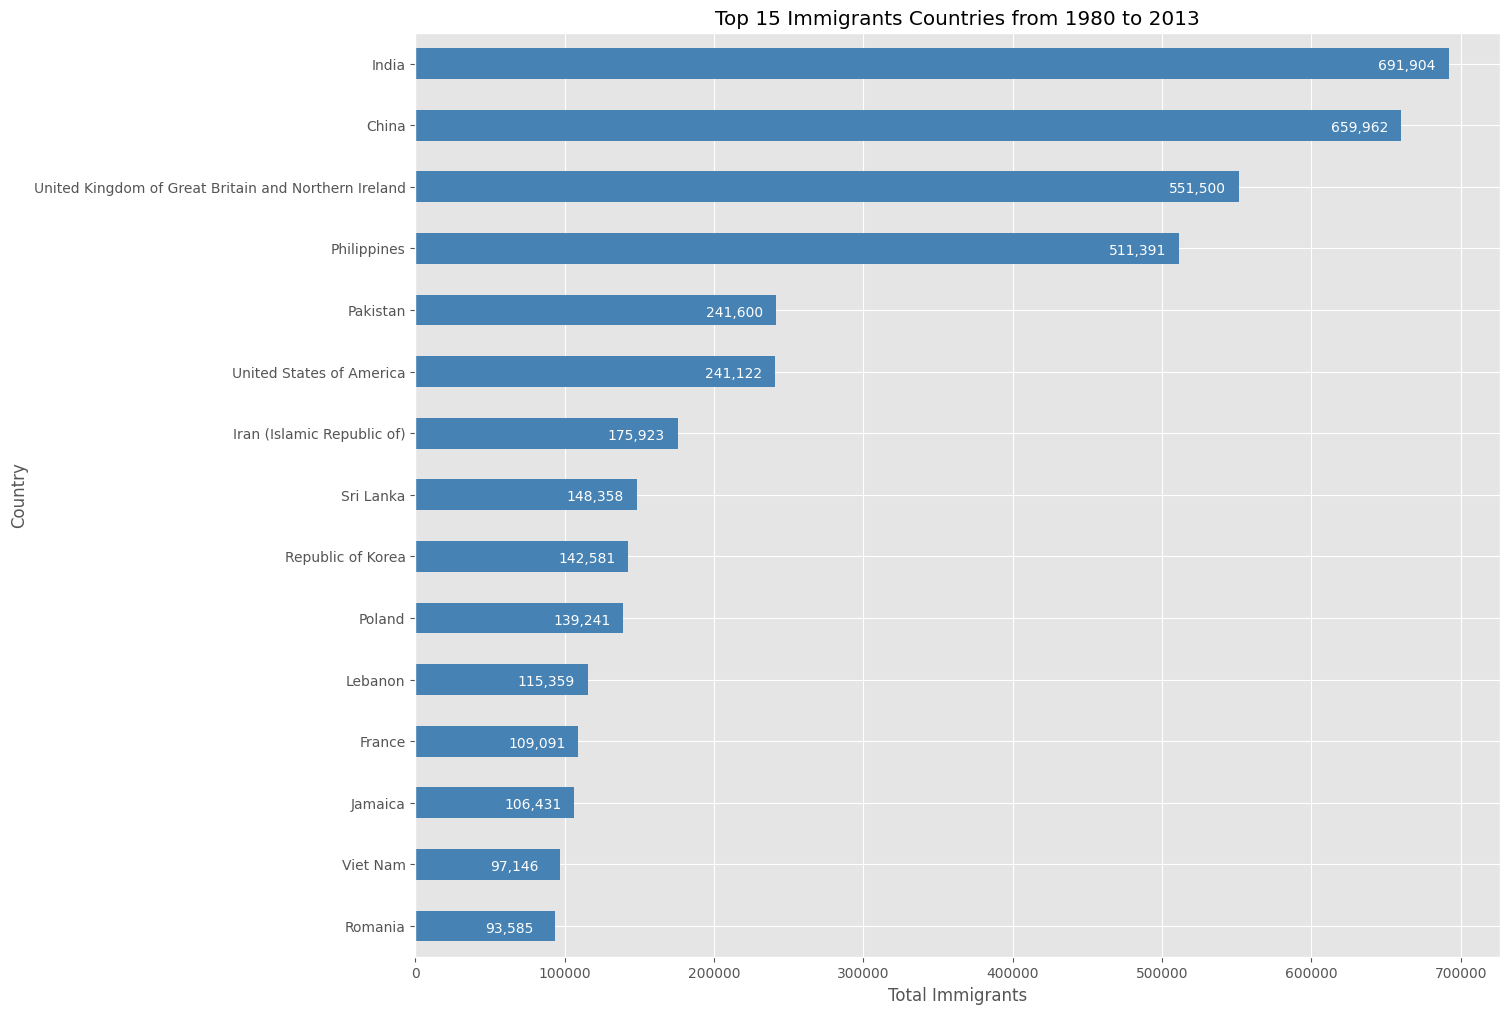

In [139]:
# Using the scripting later and the df dataset,
# create a horizontal bar plot showing the total
# number of immigrants to Canada from the top 15 countries,
# for the period 1980 - 2013. Label each country with the total immigrant count.

df.sort_values('Total', ascending=True, inplace=True)
df_top15 = df['Total'].tail(15)

df_top15.plot(kind='barh', figsize=(14,12), color= 'steelblue')
plt.title('Top 15 Immigrants Countries from 1980 to 2013')
plt.xlabel('Total Immigrants')
plt.ylabel('Country')

for index, value in enumerate(df_top15):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

### Thank you

## Author

<a href="https://www.linkedin.com/in/neeleshchidar37/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">Neelesh Chidar</a>